In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [10]:
x0, y0 = make_classification(n_samples=200, n_features=2, n_classes=2,
                               n_informative=2, n_redundant=0, class_sep=1.4,
                               flip_y=0., shuffle=False, n_clusters_per_class=1, random_state=123)

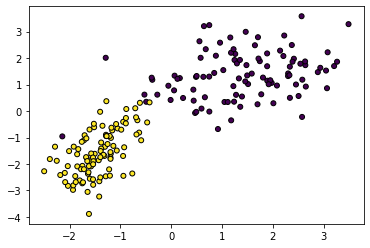

In [11]:
plt.scatter(x0[:, 0], x0[:, 1], marker="o", c=y0, s=25, edgecolor="k")

In [12]:
x1, y1 = make_classification(n_samples=200, n_features=2, n_classes=2,
                               n_informative=2, n_redundant=0, class_sep=0.9,
                               flip_y=0., shuffle=False, n_clusters_per_class=1, random_state=123)

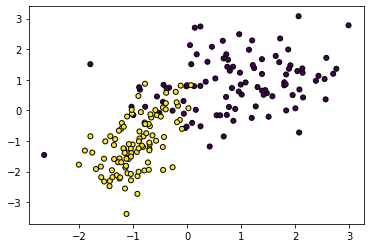

In [13]:
plt.scatter(x1[:, 0], x1[:, 1], marker="o", c=y1, s=25, edgecolor="k")

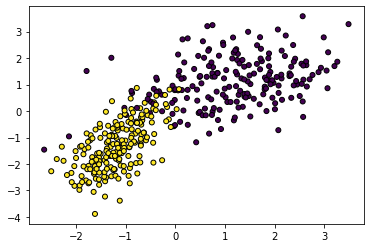

In [14]:
xc = np.vstack([x0, x1])
yc = np.concatenate([y0, y1])

plt.scatter(xc[:, 0], xc[:, 1], marker="o", c=yc, s=25, edgecolor="k")

In [2]:
def trainandtest_svm(x, y, shuffle=True, seed=42):
    
    zscore = lambda x: (x - np.mean(x))/np.std(x)
    
    if shuffle:
        rng = np.random.default_rng(seed=seed)
        shuffled_indices = rng.permutation(len(x))
        x = x[shuffled_indices]
        y = y[shuffled_indices]
    
    train_x = x[:800]
    train_y = y[:800]
    test_x = x[800:]
    test_y = y[800:]

    train_z = zscore(train_x)
    test_z = zscore(test_x)

    clf = svm.SVC(kernel='linear')
    clf.fit(train_z, train_y)

    y_pred = clf.predict(test_z)

    # Compute distance from bound
    y = clf.decision_function(test_z)
    w_norm = np.linalg.norm(clf.coef_)
    dist = y / w_norm

    zscoredist = zscore(dist)
    zscoredist[test_y==0] *= -1
    
    return np.mean(zscoredist)

In [3]:
x0, y0 = make_classification(n_samples=1000, n_features=200, n_classes=2,
                               n_informative=200, n_redundant=0, class_sep=0.4,
                               flip_y=0., shuffle=False, n_clusters_per_class=2, random_state=123)

In [4]:
x1, y1 = make_classification(n_samples=1000, n_features=200, n_classes=2,
                               n_informative=200, n_redundant=0, class_sep=0.9,
                               flip_y=0., shuffle=False, n_clusters_per_class=2, random_state=123)

In [5]:
xavg = (x0 + x1)/2

In [6]:
dist0 = trainandtest_svm(x0, y0)

In [7]:
dist0

0.10845767184336859

In [8]:
dist1 = trainandtest_svm(x1, y1)

In [9]:
dist1

0.42452758669887586

In [10]:
distavg = trainandtest_svm(xavg, y0)

In [11]:
distavg

0.25410803446427865